In [3]:
import numpy as np


class planet:
    '''
    Класс планеты для изучения движения
    тел в центральном поле.
    ________________________________________________
    Сигнатура:
            r0 - начальное положение относительно центра поля;
            v0 - начальный вектор скорости тела;
    '''
    
    
    def __init__(self,
                 r0=[1.5, 0, 0],
                 v0=[0, 0.6, 0],
                 ):
        
        self.r = np.array([[r0[0]], [r0[1]], [r0[2]]], dtype=np.float64)
        self.v = np.array([[v0[0]], [v0[1]], [v0[2]]], dtype=np.float64)
        self.r = self.r - self.v*dt/2
        self.R = self.r
        self.α = α
   


In [42]:
def abs_vector(u):
    return (u[0]**2 + u[1]**2 + u[2]**2)**(1/2)


def force_law(α, index, *planet):
    if index == '11' or index == '22':
        return - α * (planet[0].r/ abs_vector(planet[0].r)**3)
    elif index == '12':
        return + α * ((planet[1].r - planet[0].r)/ abs_vector(planet[1].r - planet[0].r)**3)

    elif index == '21':
        return - force_law(α, '12', planet[0], planet[1]) # :)
    else:
        return 1/0

def step(p1, p2, α,  dt):
    '''
    Функция шага для взаимодействия двух тел.
    Позволяет наблюдать движение двух тел в гравитационном поле.
    '''
    p1.r += p1.v*dt
    p2.r += p2.v*dt
    p1.R = np.append(p1.R, p1.r, axis=1)
    p2.R = np.append(p2.R, p2.r, axis=1)
    p1.v += force_law(α, '12', p1, p2)*dt # + force_law(α, '11', p1)*dt
    p2.v += force_law(α, '21', p1, p2)*dt # + force_law(α, '22', p2)*dt

<IPython.core.display.Javascript object>


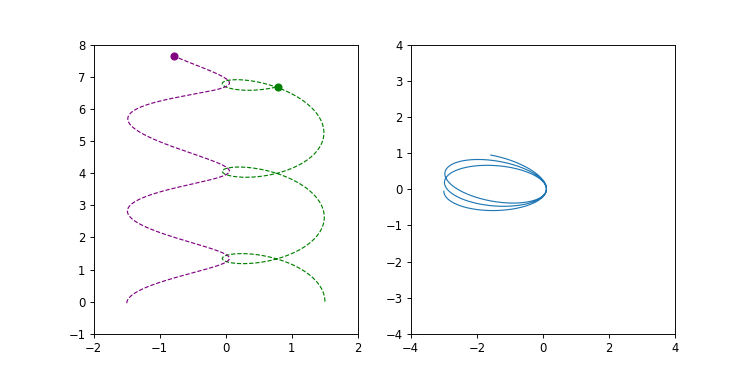

In [51]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

fig = plt.figure(figsize=(9, 4.5))
ax1 = fig.add_subplot(121, xlim=(-2, 2), ylim=(-1, 8))
ax2 = fig.add_subplot(122, xlim=(-4, 4), ylim=(-4, 4))


def init():
    p1_dot.set_data([], [])
    p2_dot.set_data([], [])
    rphi1.set_data([], [])
    rphi2.set_data([], [])
    relative21.set_data([], [])
    return p1_dot, p2_dot, rphi1, rphi2, relative21,


def redraw(i, p1_dot, p2_dot, rphi1, rphi2, relative21, p1, p2, α, dt):
    step(p1, p2, α, dt)
    
    p1_dot.set_data(p1.r[0], p1.r[1])
    p2_dot.set_data(p2.r[0], p2.r[1])
    rphi1.set_data(p1.R[0], p1.R[1])
    rphi2.set_data(p2.R[0], p2.R[1])
    relative21.set_data(p2.R[0]-p1.R[0], p2.R[1]-p1.R[1])
    return p1_dot, p2_dot, rphi1, rphi2, relative21



dt = 0.01
α = 2
p1 = planet()# r0=[1, 1, 0])
p2 = planet(r0=[-1.5, -0.05, 0], v0=[0, +0.3, 0]) # r0=[0.5, -1.05, 0])

p1_dot, = ax1.plot(p1.r[0], p1.r[1], 'bo', c='green', lw=1)
p2_dot, = ax1.plot(p2.r[0], p2.r[1], 'bo', c='purple', lw=1)
rphi1, = ax1.plot(p1.R[0], p1.R[1], ls='--', c='green', lw=1) 
rphi2, = ax1.plot(p2.R[0], p2.R[1], ls='--', c='purple', lw=1)
relative21, = ax2.plot((p2.R[0]-p1.R[0]), (p2.R[1]-p1.R[1]), lw=1)
# relative12, = ax1.plot(p1.R[0]-p2.R[0], p1.R[1]-p2.R[1], lw=1)
# center1, = ax1.plot([0], [0], '*', c='orange', lw=1)
# center2, = ax2.plot([0], [0], '*', c='orange', lw=1)

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=600,
                               init_func=init,
                               interval=1,
                               blit=True,
                               fargs=(p1_dot,
                                      p2_dot,
                                      rphi1,
                                      rphi2,
                                      relative21,
                                      p1, p2, α, dt,)
                               )